In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
from tabulate import tabulate

In [25]:
def load_exp(name):
    loss_history_path = os.path.join('nn_exp_losses/', name, 'loss_history.txt')
    coords_history_path = os.path.join('nn_exp_losses/', name, 'coords_history.txt')
    with open(loss_history_path, "r") as loss, open(coords_history_path, "r") as coords:
        loss = list(map(float, loss.readlines()))
        coords = list(map(int, coords.readlines()))
        return loss, coords

In [26]:
def get_exp(name, label):
    loss, coords = load_exp(name)
    return {
        "name": name,
        "label": label,
        "loss": loss,
        "coords": np.cumsum(coords),
    }

In [30]:
experiments = [
    get_exp('marina', "Marina, p=0.3, Q=TopK(0.3)"),
    get_exp('marina_2', "Marina, p=0.2, Q=TopK(0.1)"),
    get_exp('penalty', "Without"),
    get_exp('rand05', "Rand 0.5"),
    get_exp('reduce_probability', "Reduce Probability 0.5"),
    get_exp('top05', "Top 0.5"),
    get_exp('topUnknown', "Top Unknown"),
    get_exp('without', "Without"),
]

exps.sort(key=lambda exp : exp['coords'][-1])

table = [
    ["compression", "transmitted coordinates"],
    *[
        [exp['name'], exp['coords'][-1]]
        for exp in experiments
    ]
]
print(tabulate(table))

------------------  -----------------------
compression         transmitted coordinates
marina              1270495183
marina_2            848006320
penalty             1135722750
rand05              1302295420
reduce_probability  1256866510
top05               1431010665
topUnknown          278573799
without             3028594000
------------------  -----------------------


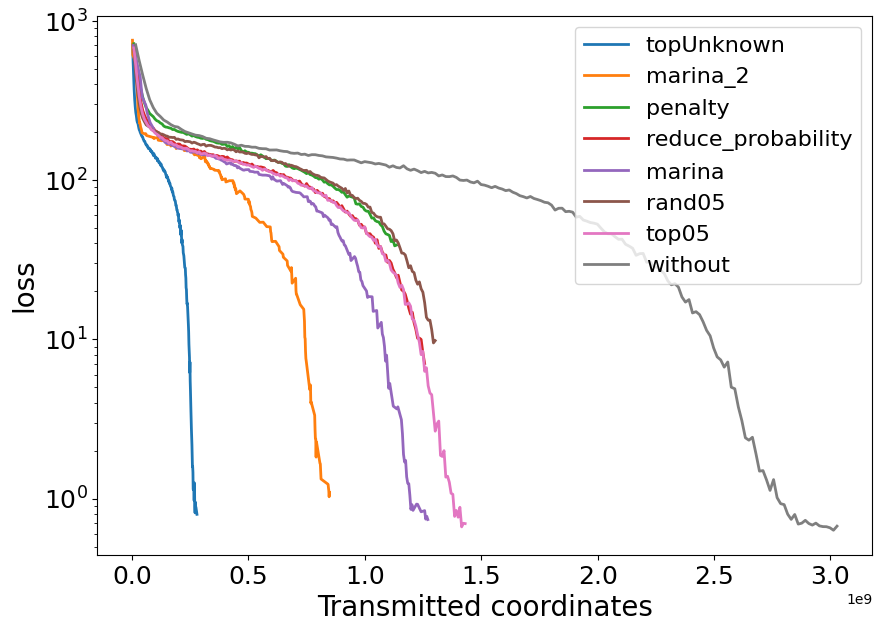

In [31]:
plt.figure(figsize=(10, 7))

for exp in exps:
    plt.semilogy(
        exp['coords'],
        exp['loss'],
        label=exp['name'],
        linewidth=2
    )

plt.legend(loc="best", fontsize=16)
plt.xlabel(r"Transmitted coordinates", fontsize=20)
plt.ylabel("loss", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)